# Judi's Project
This project is using the publicly available data from the Human Connectome Project (HCP)
Data dictionary available here: https://wiki.humanconnectome.org/display/PublicData/HCP+Data+Dictionary+Public-+500+Subject+Release?src=contextnavpagetreemode

(Correlate some cognitive performance with human brain image properties from DTI & fMRI studies , e.g memory/spatial test with HPC)

Test whether performance differences in a spatial orientation task are explained:  
*) gender
*) hipocampal volume 

Aims: 
*) characterise spatial orientation performance

*****
Aims: 
    * Characterise HPC properties (e.g. volume/surface), correlated with verbal episodic memory & VSPLOT (for loop?)  
    * characterise total score verbal episodic memory for M/F
    * Determine if there is a relationship between HPC properties & verbal episodic memory (ie. regression + check assumptions)
    


In [2]:
#Load packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#Load data from source file
HCP_data = pd.read_csv('C:/Users/Judi/Documents/Project_HCP/unrestricted_jhuber_6_23_2017_7_25_10.csv')
#HCP_data = pd.read_csv('C:/Users/Judita/HCP_Data/unrestricted_jhuber_7_24_2017_4_28_55.csv')

HCP_data.shape

(1206, 573)

In [5]:
gender_grouping = HCP_data.groupby('Gender')
gender_grouping.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,A,5.2,101.12,86.45,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,N,NaN,108.79,97.19,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,A,3.6,101.12,86.45,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,A,2.0,108.79,98.04,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,A,2.0,122.25,110.45,38.6,84.84,85.31,1.92,1.0,1.88
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,SA,6.0,122.25,111.41,38.6,123.80,123.31,1.80,0.0,1.80
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,A,6.8,108.79,97.19,50.1,134.65,131.38,1.84,0.0,1.84
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,N,-99.0,101.12,87.11,50.1,105.57,102.32,1.92,0.0,1.92
10,101612,S900,Q11,F,26-30,False,0,0,0,0.0,...,A,NaN,122.25,111.41,48.7,97.26,96.41,1.84,0.0,1.84
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,SA,4.4,96.87,77.61,38.6,112.11,111.70,1.84,1.0,1.80


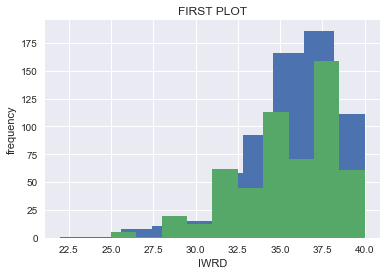

In [6]:
#plot at least one histogram of the data, with title and labelled axes
gender_hist = gender_grouping.IWRD_TOT.hist(bins=10)
#plt.Axes.set_xlabel('label')
plt.xlabel("IWRD")
plt.ylabel("frequency")
plt.title("FIRST PLOT")
plt.legend(())

#PLOT SEVERAL TESTS

In [7]:
HCP_data.columns

Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'NEORAW_60', 'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=573)

In [8]:
# select hippocampal & temporal lobe information

#select appropriate columns
filter_col = [col for col in HCP_data.columns 
            if col.startswith('FS_L_Parahippocampal') | 
            col.startswith('FS_R_Parahippocampal') |
            col.startswith('FS_L_Hipp') | 
            col.startswith('FS_R_Hipp') |
            col.startswith('Age') |
            col.startswith('IWRD_TOT') |
            col.startswith('VSPLOT_TC') |
            col.startswith('Gender')] 
filter_col



['Gender',
 'Age',
 'VSPLOT_TC',
 'IWRD_TOT',
 'FS_L_Hippo_Vol',
 'FS_R_Hippo_Vol',
 'FS_L_Parahippocampal_Thck',
 'FS_R_Parahippocampal_Thck',
 'FS_L_Parahippocampal_Area',
 'FS_R_Parahippocampal_Area']

In [9]:
HCP_data_f = HCP_data[filter_col] #use filter in data frame to select specified columns
HCP_data_f = HCP_data_f[~HCP_data_f.FS_L_Hippo_Vol.isnull()]
HCP_data_f = HCP_data_f[~HCP_data_f.IWRD_TOT.isnull()]
#new_FS = HCP_data_f[~HCP_data_f.FS_HPCvol_sum_norm.isnull()]
HCP_data_f.shape #check that correct shape 
#HCP_data_f_m.shape #check that correct shape 


(1105, 10)

In [10]:
HCP_data_f

,Gender,Age,VSPLOT_TC,IWRD_TOT,FS_L_Hippo_Vol,FS_R_Hippo_Vol,FS_L_Parahippocampal_Thck,FS_R_Parahippocampal_Thck,FS_L_Parahippocampal_Area,FS_R_Parahippocampal_Area
1,M,26-30,12.0,34.0,4896.0,4963.0,2.916,2.487,839.0,834.0
2,F,26-30,9.0,35.0,4140.0,4590.0,2.460,2.814,760.0,566.0
3,M,31-35,17.0,37.0,2571.0,4687.0,2.210,2.423,1233.0,743.0
4,M,26-30,18.0,38.0,5608.0,5903.0,3.324,2.775,722.0,731.0
5,F,31-35,20.0,37.0,3925.0,3548.0,2.616,2.836,687.0,574.0
6,M,22-25,16.0,30.0,4610.0,4586.0,3.219,2.774,543.0,647.0
8,M,26-30,10.0,34.0,4818.0,4761.0,2.652,2.535,722.0,627.0
9,M,26-30,14.0,32.0,4833.0,5108.0,2.425,2.720,845.0,920.0
11,F,31-35,14.0,35.0,4211.0,4329.0,2.658,2.675,674.0,679.0
12,M,22-25,13.0,38.0,4081.0,4082.0,2.470,2.738,871.0,771.0


In [13]:
#create composite scores as well (matrix operations!) 

#normalise volume by supratentorial volume 
HCP_data_f['FS_L_Hippo_Vol_norm'] = HCP_data_f.FS_L_Hippo_Vol / HCP_data.FS_SupraTentorial_Vol *100
HCP_data_f['FS_R_Hippo_Vol_norm'] = HCP_data_f.FS_R_Hippo_Vol / HCP_data.FS_SupraTentorial_Vol *100
HCP_data_f['FS_HPCvol_sum'] = HCP_data_f.FS_R_Hippo_Vol + HCP_data_f.FS_L_Hippo_Vol *100

HCP_data_f['FS_HPCvol_sum_norm'] = HCP_data_f.FS_HPCvol_sum / HCP_data.FS_SupraTentorial_Vol *100
HCP_data_f.head() 

,Gender,Age,VSPLOT_TC,IWRD_TOT,FS_L_Hippo_Vol,FS_R_Hippo_Vol,FS_L_Parahippocampal_Thck,FS_R_Parahippocampal_Thck,FS_L_Parahippocampal_Area,FS_R_Parahippocampal_Area,FS_L_Hippo_Vol_norm,FS_R_Hippo_Vol_norm,FS_HPCvol_sum,FS_HPCvol_sum_norm
1,M,26-30,12.0,34.0,4896.0,4963.0,2.916,2.487,839.0,834.0,0.394937,0.400341,494563.0,39.894022
2,F,26-30,9.0,35.0,4140.0,4590.0,2.460,2.814,760.0,566.0,0.432324,0.479316,418590.0,43.711721
3,M,31-35,17.0,37.0,2571.0,4687.0,2.210,2.423,1233.0,743.0,0.232274,0.423442,261787.0,23.650871
4,M,26-30,18.0,38.0,5608.0,5903.0,3.324,2.775,722.0,731.0,0.485513,0.511053,566703.0,49.062349
5,F,31-35,20.0,37.0,3925.0,3548.0,2.616,2.836,687.0,574.0,0.428039,0.386925,396048.0,43.190803


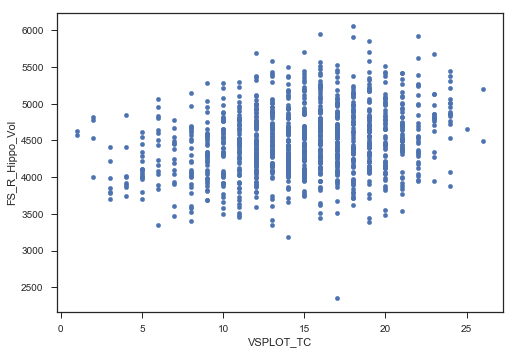

In [19]:
HCP_data_f.plot.scatter(x='VSPLOT_TC', y='FS_R_Hippo_Vol')


In [14]:
#create at least one plot of analysis results, with title and labelled axes

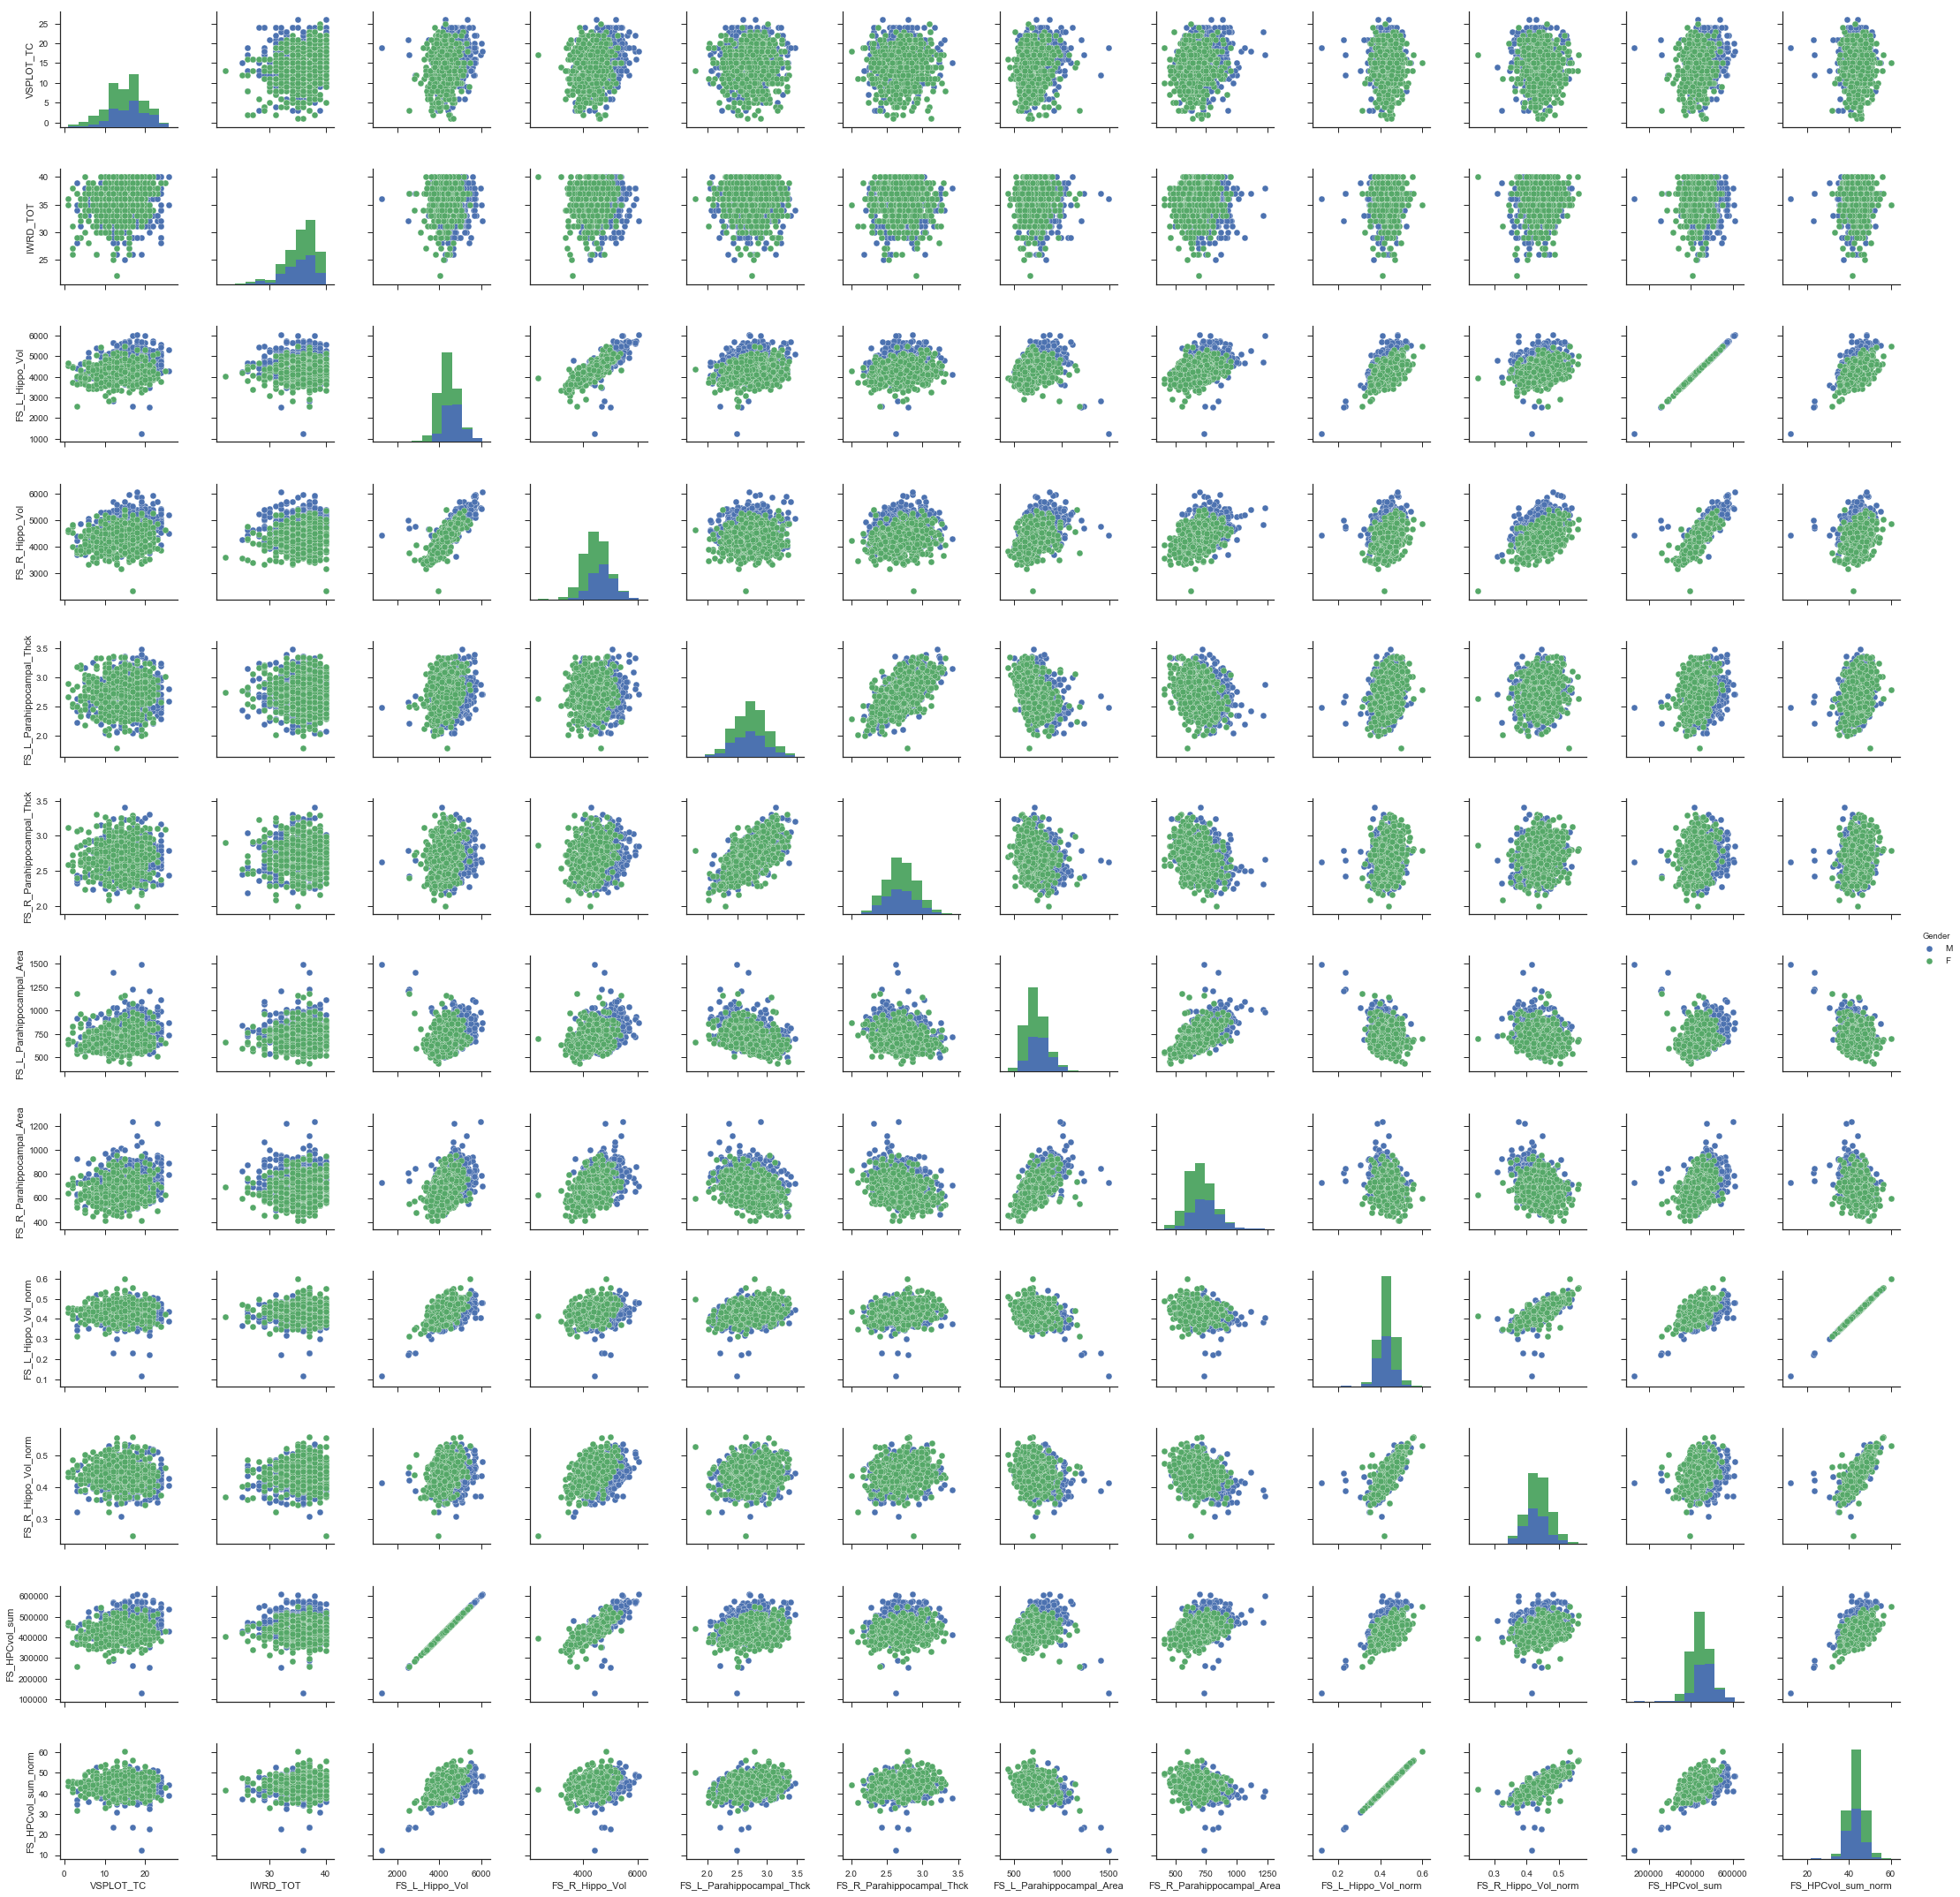

In [18]:
sns.set(style="ticks")

sns.pairplot(HCP_data_f,  dropna=True, hue = "Age")

In [ ]:
# write own function

In [ ]:
#use at least one numpy array

    use an if-elif-else clause
    use a for loop
    use a while loop
    write at least one function, include a docstring
    print out some results in at least one nicely formatted string, using string operator % or .format() method
    use at least one vectorized math operation on an array
    use at least one matrix operation on a 2D array
    create a figure with multiple axes (i.e., use plt.subplots(nrows, ncols))
    do a statistical test - show that the test assumptions hold for your data
    manipulate and analyze data in a pandas series or dataframe
    use an image processing algorithm
    use a clustering algorithm
    use some other non-trivial algorithm: e.g. regression, curve fitting, signal analysis…
    version control your code using git: create a local repository and make at least 5 commits while developing your code


In [ ]:
# select which variable 

In [20]:
for i in range(1,10):
    print(i)


1
2
3
4
5
6
7
8
9
